# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. You have to provide the prompts by using any AI(Chatgpt, Perplexity, etc) to get the answers for each question.
4. Provide the screenshot of the prompt and the output provided by the AI in the word document.
5. Each Task is presenting a challenge.

## Task1: K-means (35 points)

Run this cell to read and display top 5 rows of data

In [ ]:
import pandas as pd

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Part 1A: 3 points
Check if there are any missing values. If yes, fill them with appropriate methods. Regardless of any action, explain your decision for the action.

Comment your action here

### Part 1B: 3 points

Drop necessary columns that won't be used for clustering and Scale the data for further processing. Display the processed data. Explain your actions.

In [ ]:
# Explain your actions

### Part 1C: 4 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 2 to 12 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters).

Explain from the graph which is the most appropriate value for k.

In [ ]:
# Interpret the results

### Part 1D: 5 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2-12). Explain which K value you selected from the results and why?

In [ ]:
# Interpret!

### Part 1E: 5 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

### Part 1F: 5 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [ ]:
# Interpret your results

### Part 1G: 5 points

Display top 5 countries within each group/cluster. If there aren't enough countries within that cluster, just display that many.

### Part 1H: 5 points

Plot health vs life-expec and shade each point belonging to it's respective cluster.

## Task2: Hierarchical Clustering (35 points)

### Part 2A: 10 points

Plot the co-ordinates from the imported data and guess possible clusters that could be formed.

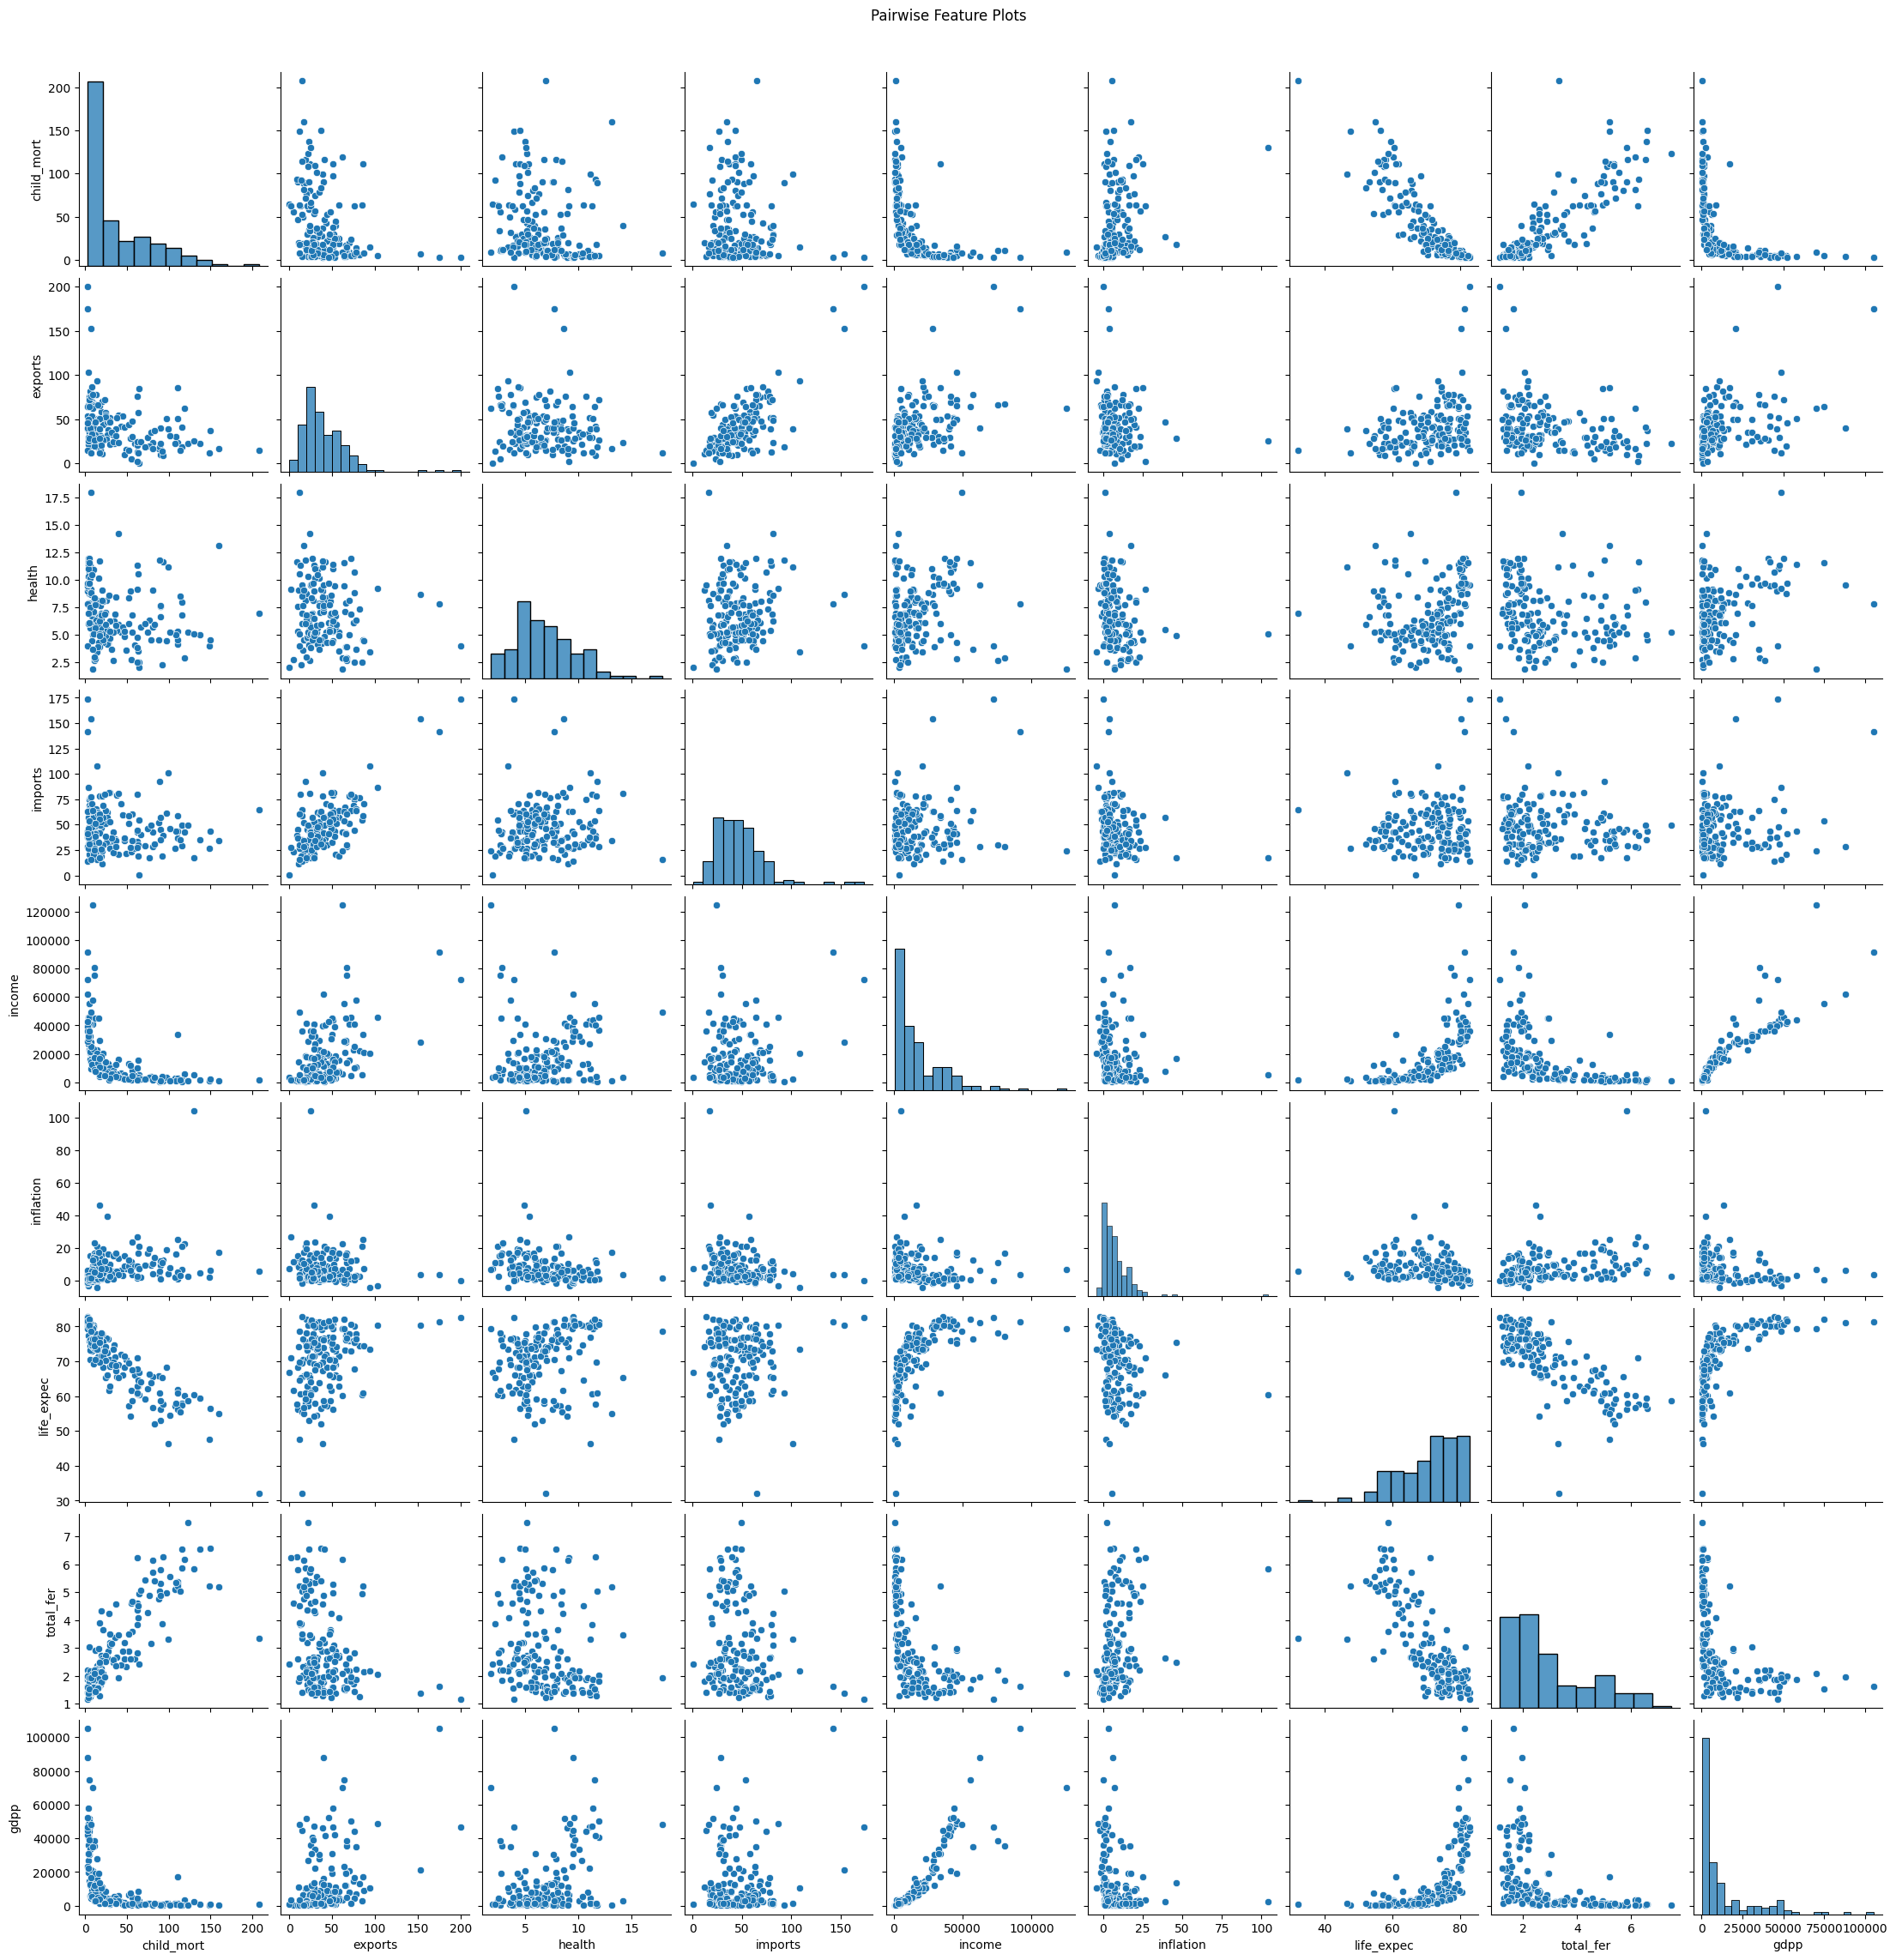

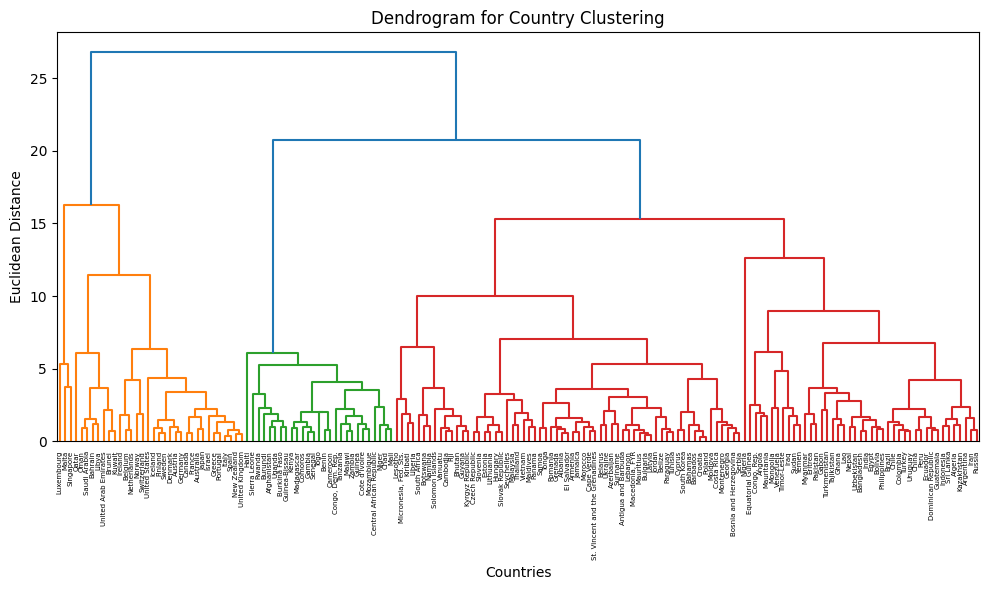

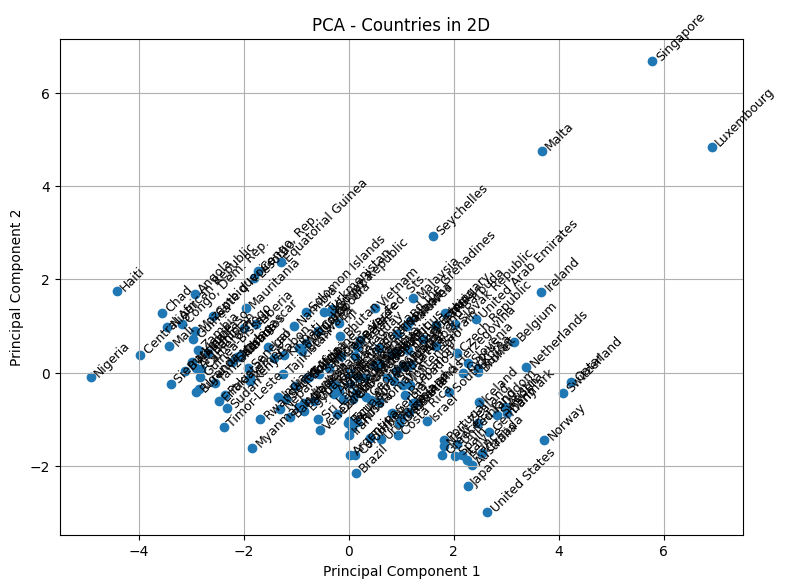

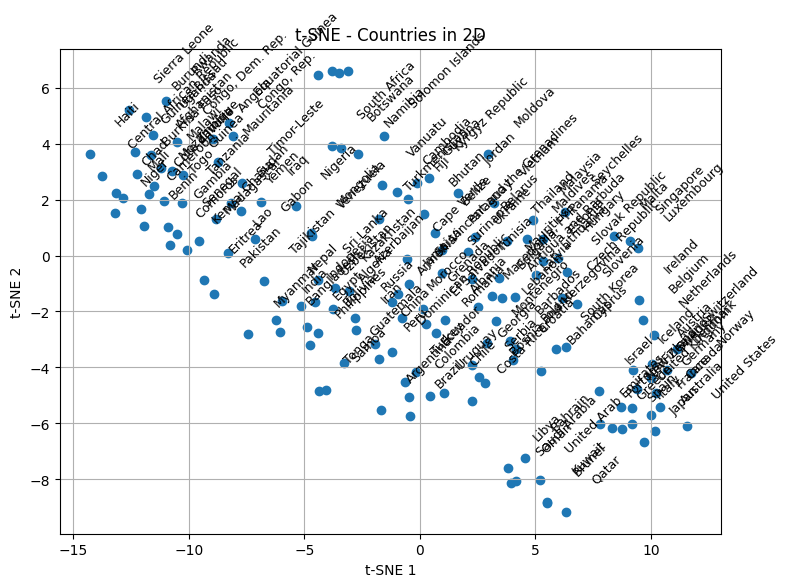

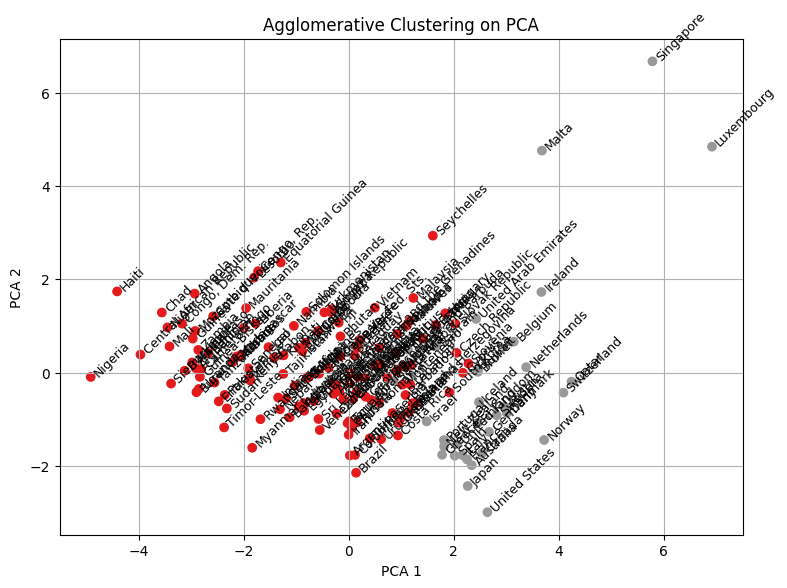

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

df = pd.read_csv('/content/Country-data.csv')

features = df.drop(columns=['country'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

sns.pairplot(df.drop(columns=['country']))
plt.suptitle("Pairwise Feature Plots", y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='ward'), labels=df['country'].values)
plt.title("Dendrogram for Country Clustering")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, country in enumerate(df['country']):
    plt.annotate(country, (pca_result[i, 0] + 0.02, pca_result[i, 1] + 0.02), rotation=45, fontsize=9)
plt.title('PCA - Countries in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, country in enumerate(df['country']):
    plt.annotate(country, (tsne_result[i, 0] + 1.0, tsne_result[i, 1] + 1.0), rotation=45, fontsize=9)
plt.title('t-SNE - Countries in 2D')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.tight_layout()
plt.show()

model = AgglomerativeClustering(n_clusters=2)
labels = model.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='Set1')
for i, country in enumerate(df['country']):
    plt.annotate(country, (pca_result[i, 0] + 0.02, pca_result[i, 1] + 0.02), rotation=45, fontsize=9)
plt.title("Agglomerative Clustering on PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Based on the analysis, it seems that the data could form two broad clusters, potentially distinguishing between developed and developing countries. One cluster might represent economically advanced nations with higher GDP, more reliance on renewable energy, and other indicators of industrial development, while the other cluster could consist of developing countries with lower GDP and a greater reliance on non-renewable energy. The dendrogram, PCA, t-SNE, and agglomerative clustering results should confirm this hypothesis by showing distinct groupings of countries, possibly along economic lines or even regional similarities, such as developed countries from Europe or North America forming one group and developing nations from Africa or Asia forming another.

### Part 2B: 15 points

Using Hierarchical clustering with euclidean + ward and manhattan + average, display the results for clusters 4,5,6 and 7. Add tittle for each plot.

From the results, what according to you should be the appropriate value of K and for which pair of affinity and linkage? Interpret your results. Did this match with your previous guess?

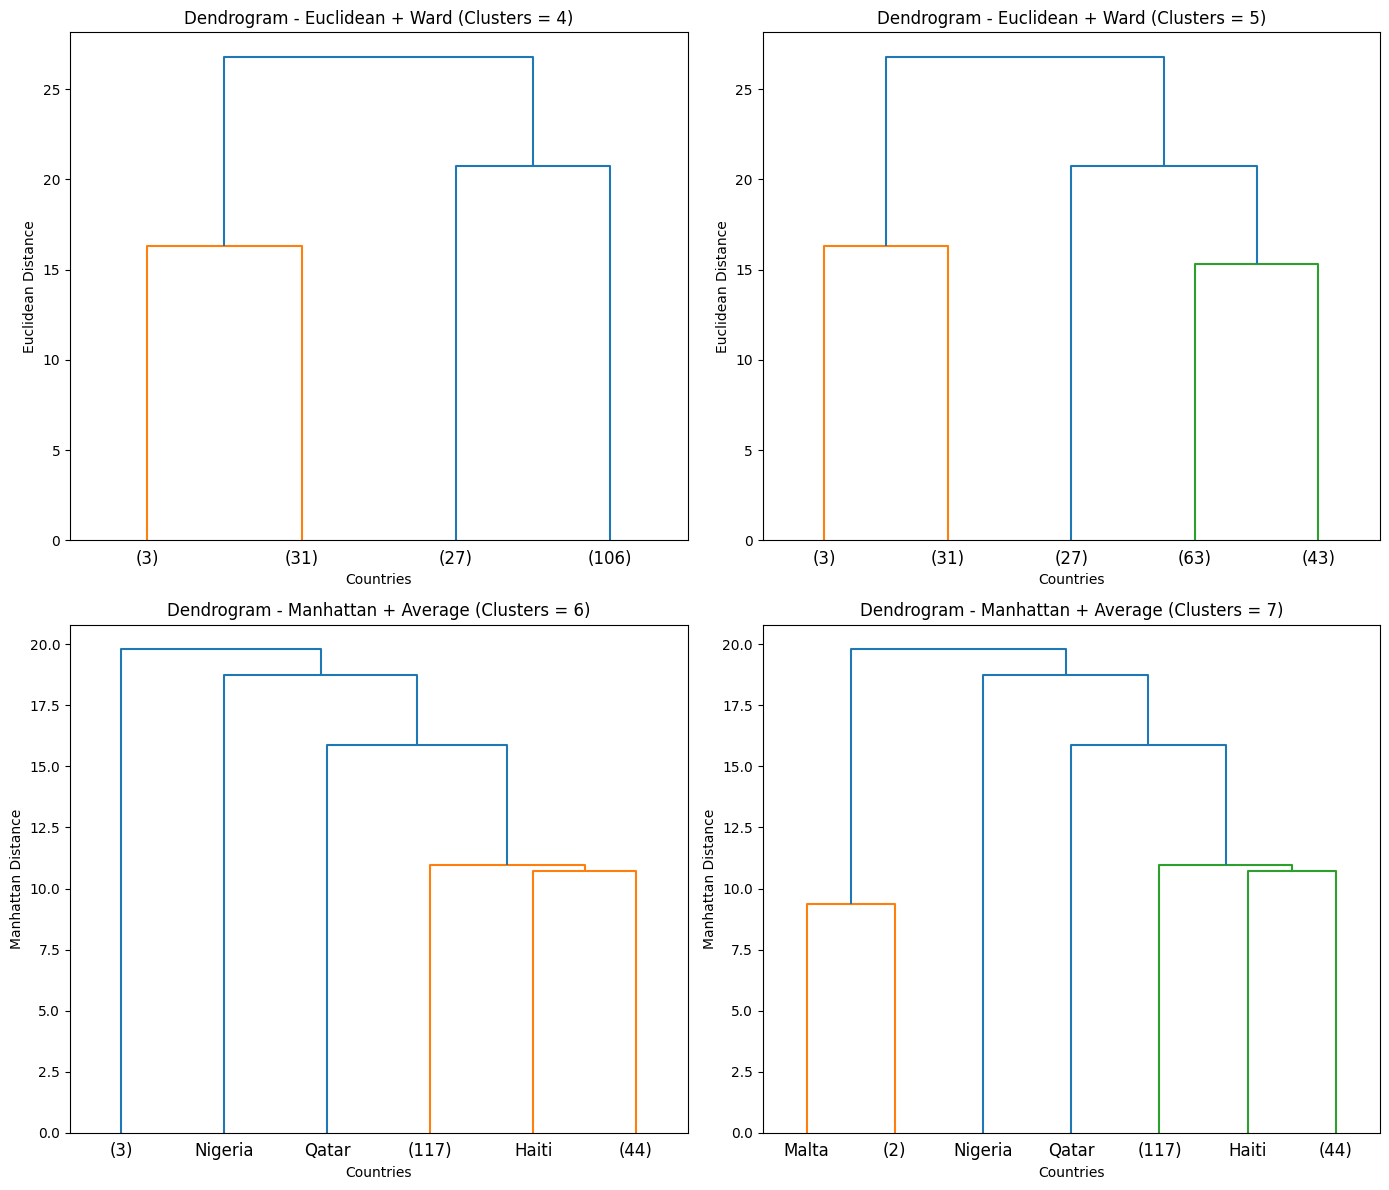

In [6]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

euclidean_ward = sch.linkage(scaled_data, method='ward', metric='euclidean')

manhattan_average = sch.linkage(scaled_data, method='average', metric='cityblock')

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sch.dendrogram(euclidean_ward, labels=df['country'].values, ax=axes[0, 0], truncate_mode='lastp', p=4)
axes[0, 0].set_title('Dendrogram - Euclidean + Ward (Clusters = 4)')
axes[0, 0].set_xlabel('Countries')
axes[0, 0].set_ylabel('Euclidean Distance')

sch.dendrogram(euclidean_ward, labels=df['country'].values, ax=axes[0, 1], truncate_mode='lastp', p=5)
axes[0, 1].set_title('Dendrogram - Euclidean + Ward (Clusters = 5)')
axes[0, 1].set_xlabel('Countries')
axes[0, 1].set_ylabel('Euclidean Distance')

sch.dendrogram(manhattan_average, labels=df['country'].values, ax=axes[1, 0], truncate_mode='lastp', p=6)
axes[1, 0].set_title('Dendrogram - Manhattan + Average (Clusters = 6)')
axes[1, 0].set_xlabel('Countries')
axes[1, 0].set_ylabel('Manhattan Distance')

sch.dendrogram(manhattan_average, labels=df['country'].values, ax=axes[1, 1], truncate_mode='lastp', p=7)
axes[1, 1].set_title('Dendrogram - Manhattan + Average (Clusters = 7)')
axes[1, 1].set_xlabel('Countries')
axes[1, 1].set_ylabel('Manhattan Distance')

plt.tight_layout()
plt.show()


Based on the hierarchical clustering results, I selected K=4 for Euclidean + Ward and K=6 for Manhattan + Average. For Euclidean + Ward, K=4 provided clear, well-separated clusters with significant vertical distances in the dendrogram, indicating distinct and meaningful groupings, likely corresponding to broad categories like developed vs. developing countries or regions. Increasing the number of clusters beyond 4 didn’t add much clarity. For Manhattan + Average, K=6 offered a good balance between granularity and separation, capturing more complex relationships in the data without fragmenting it too much. The Manhattan distance and Average linkage are better suited for irregular or non-spherical clusters. These results support my previous guess that the data could be grouped into broad economic or regional categories but also reveal that non-Euclidean metrics can uncover more subtle distinctions, particularly with K=6.

### Part 2C: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

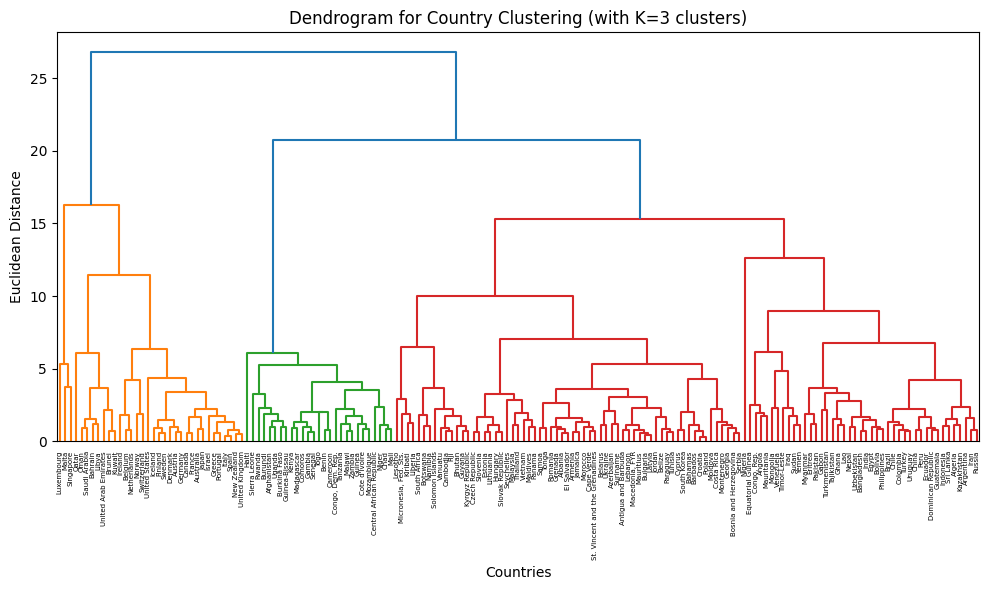

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch


df = pd.read_csv('/content/Country-data.csv')


features = df.drop(columns=['country'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


plt.figure(figsize=(10, 6))
Z = sch.linkage(scaled_data, method='ward')
sch.dendrogram(Z, labels=df['country'].values)

K = 3
plt.axhline(y=150, color='r', linestyle='--')
plt.title("Dendrogram for Country Clustering (with K=3 clusters)")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()


## Task 3: AI (15 Points)

Perform all the task using any AI where the data and the questions are same as that for Task 1.

Provide the screenshots of prompts and output of AI in word document.

## Task 4: Critical Thinking (15 Points)

### Part 1:
Why is the elbow method used to determine the optimal number of clusters in k-means clustering? What are its limitations?

### Part 2:
Why is it useful to visualize a dendrogram when performing hierarchical clustering? How can you interpret it?

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code.
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.